In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
import xgboost as xgb

In [12]:
from sklearn.neighbors import KNeighborsClassifier


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
df=pd.read_csv('UK_Accident.csv')


This Dataset contains 33 Features covering over a 1.8million records. this dataset consists of various features like,
Accidental / Longitude: Location of Accident

Accident_Severity: Accident Severity on the Scale of 1 to 5

Number_of_Vehicles: Number of Vehicles Involved

Number_of_Casualties: Number of Casualties in Accident

Light_Conditions: Lighting Condition on the day of Accident

Weather_Conditions: Weather Conditions on the day of the Accident

Road_Surface_Conditions: Road Surface Conditions of Accidental Spot

Year: Year of Accidental Event

In [15]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [16]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
1504149,464696,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [17]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [18]:
df.drop(['Unnamed: 0','Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(Highway)',
         'Longitude','Time','Pedestrian_Crossing-Physical_Facilities',
         'Pedestrian_Crossing-Human_Control','LSOA_of_Accident_Location','Latitude'],axis=1,inplace=True)

In [19]:
df.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [20]:
df.isnull().sum()

Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_A

In [21]:
df.shape

(1504150, 22)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 22 columns):
 #   Column                                       Non-Null Count    Dtype 
---  ------                                       --------------    ----- 
 0   Police_Force                                 1504150 non-null  int64 
 1   Accident_Severity                            1504150 non-null  int64 
 2   Number_of_Vehicles                           1504150 non-null  int64 
 3   Number_of_Casualties                         1504150 non-null  int64 
 4   Date                                         1504150 non-null  object
 5   Day_of_Week                                  1504150 non-null  int64 
 6   Local_Authority_(District)                   1504150 non-null  int64 
 7   1st_Road_Class                               1504150 non-null  int64 
 8   1st_Road_Number                              1504150 non-null  int64 
 9   Road_Type                                    1504150 non-

In [23]:
df.describe()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [24]:
df.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='count'>

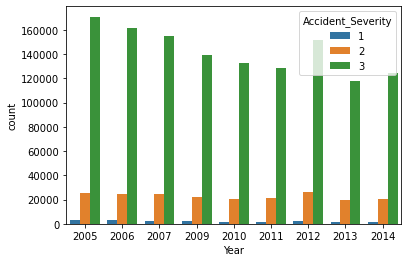

In [25]:
sns.countplot(x=df['Year'],hue=df['Accident_Severity'])

# Observations:
1. In the year 2005, maximum accident occur of type 3 of Accident_Severity.
2. In the year 2013, minimum accident occur of type 3 of Accident_Severity.

## Accident Severity
1: Fatal
2: Serious
3: Slight

<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

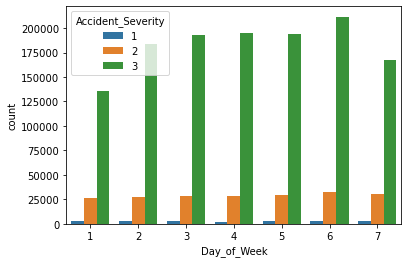

In [26]:
sns.countplot(x=df['Day_of_Week'],hue=df['Accident_Severity'])

# Observations:
1. Day 6 of week maximum accident occur of type 3 of Accident_Severity.

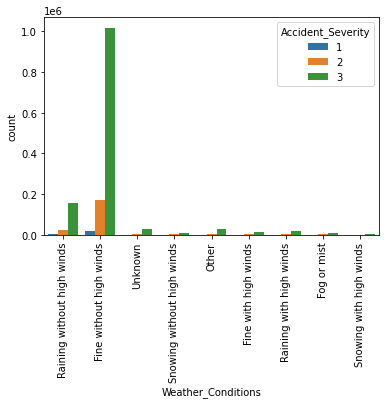

In [27]:
sns.countplot(x=df['Weather_Conditions'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. When weather condition is Find without high winds, maximum accident occur of type 3 of Accident_Severity.

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='count'>

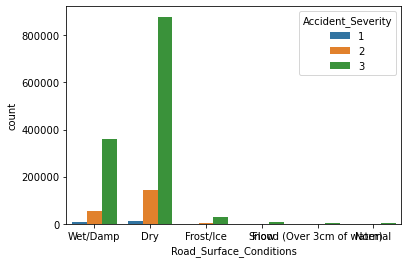

In [28]:
sns.countplot(x=df['Road_Surface_Conditions'],hue=df['Accident_Severity'])

# Observations:
1. When Road Surface condition Dry, maximum accident occur of type 3 of Accident_Severity.

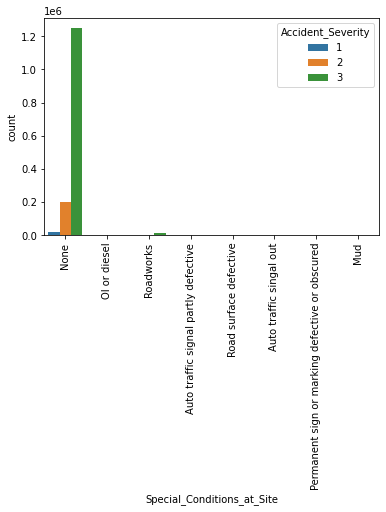

In [29]:
sns.countplot(x=df['Special_Conditions_at_Site'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. When Special Condition at Site is None, maximum accident occur of type 3 of Accident_Severity.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


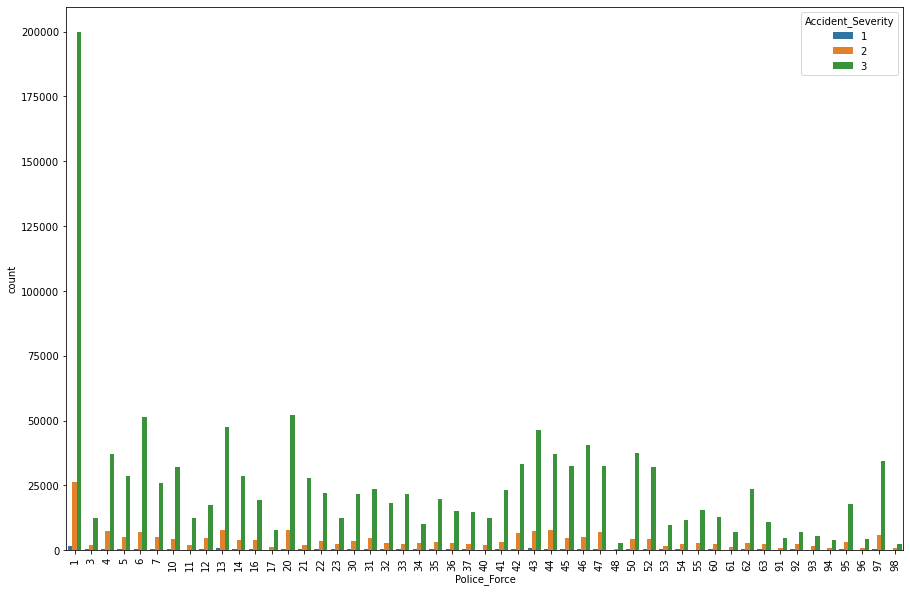

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(df['Police_Force'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. Maximum accident occur of type 3 of Accident_Severity when Police Force count is 1

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='count'>

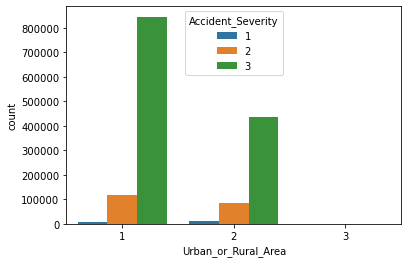

In [31]:
sns.countplot(x=df['Urban_or_Rural_Area'],hue=df['Accident_Severity'])

# Observations:
1. Maximum accident occur of type 3 of Accident_Severity at Urban Area

<AxesSubplot:xlabel='Did_Police_Officer_Attend_Scene_of_Accident', ylabel='count'>

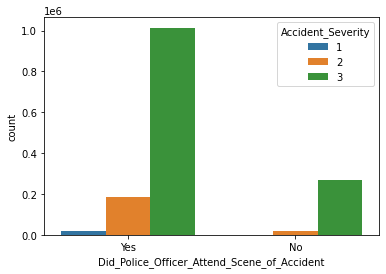

In [32]:
sns.countplot(x=df['Did_Police_Officer_Attend_Scene_of_Accident'],hue=df['Accident_Severity'])

# Observations:
1. Police Officer Attend Scene of Accident of type 3 of Accident_Severity.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


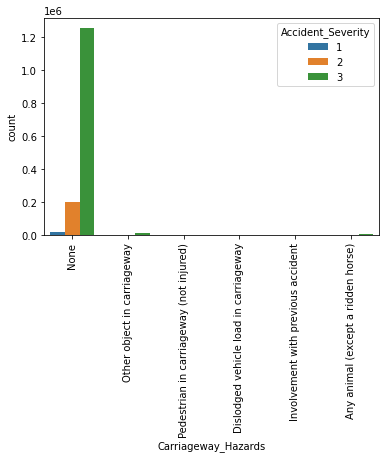

In [33]:
sns.countplot(df['Carriageway_Hazards'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. Maximum accident of type 3 of Accident_Severity occur when Carriageway Hazards is None

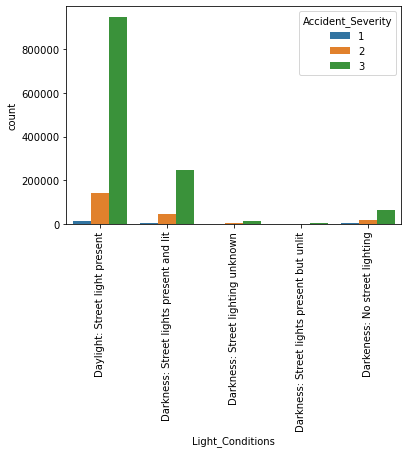

In [34]:
sns.countplot(x=df['Light_Conditions'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. Maximum accident of type 3,type2 and type1 of Accident_Severity occur at Daylight Street present.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Speed_limit', ylabel='count'>

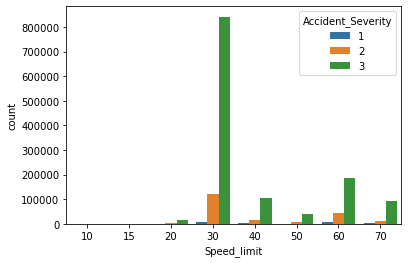

In [35]:
sns.countplot(df['Speed_limit'],hue=df['Accident_Severity'])

# Observations:
1. Maximum accident of type 3,type2 and type1 of Accident_Severity occur at Daylight Street present.

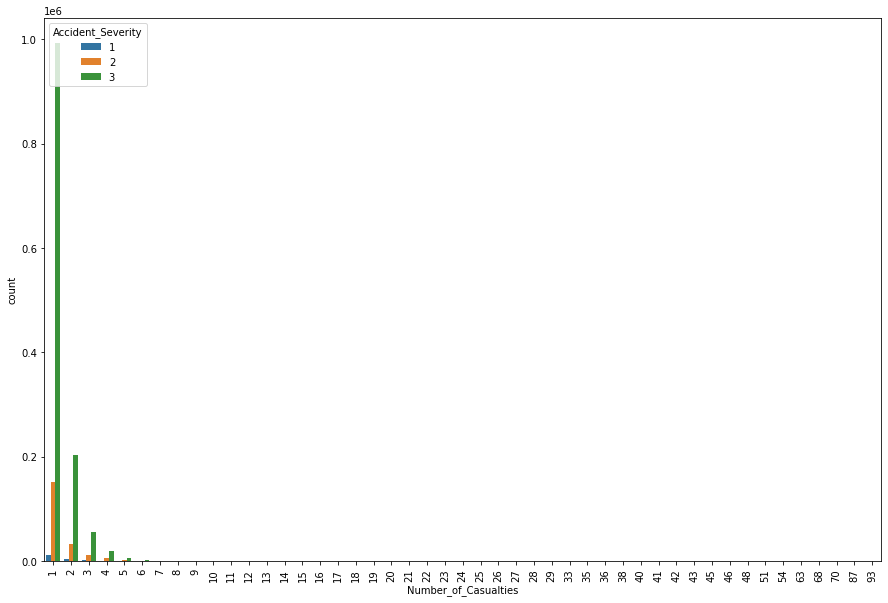

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Number_of_Casualties'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. Maximum number of Casualties is 1 for Accident_Severity type 1,type 2 and type 3

In [37]:
df['month']=pd.to_datetime(df['Date']).dt.month


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2005' in DD/MM/YYYY format. Provide form

In [38]:
df['day']=pd.to_datetime(df['Date']).dt.day


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2005' in DD/MM/YYYY format. Provide form

In [39]:
df.drop('Date',axis=1,inplace=True)

In [40]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

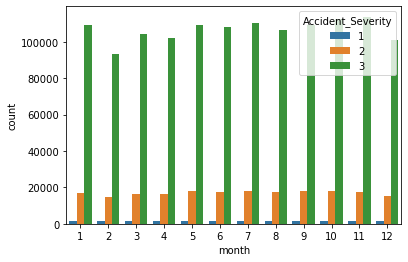

In [41]:
sns.countplot(df['month'],hue=df['Accident_Severity'])

# Observations:
1. Maximum number of Casualties happens in the month of  11 for Accident_Severity type 3

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

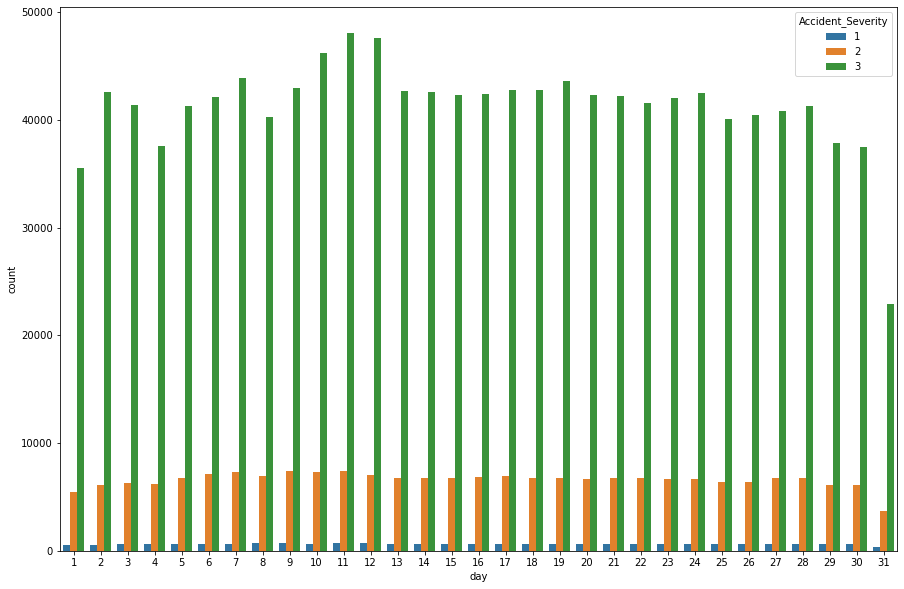

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(df['day'],hue=df['Accident_Severity'])

# Observations:
1. Maximum number of Casualties happens on 11 th day for Accident_Severity type 3

In [43]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


<AxesSubplot:>

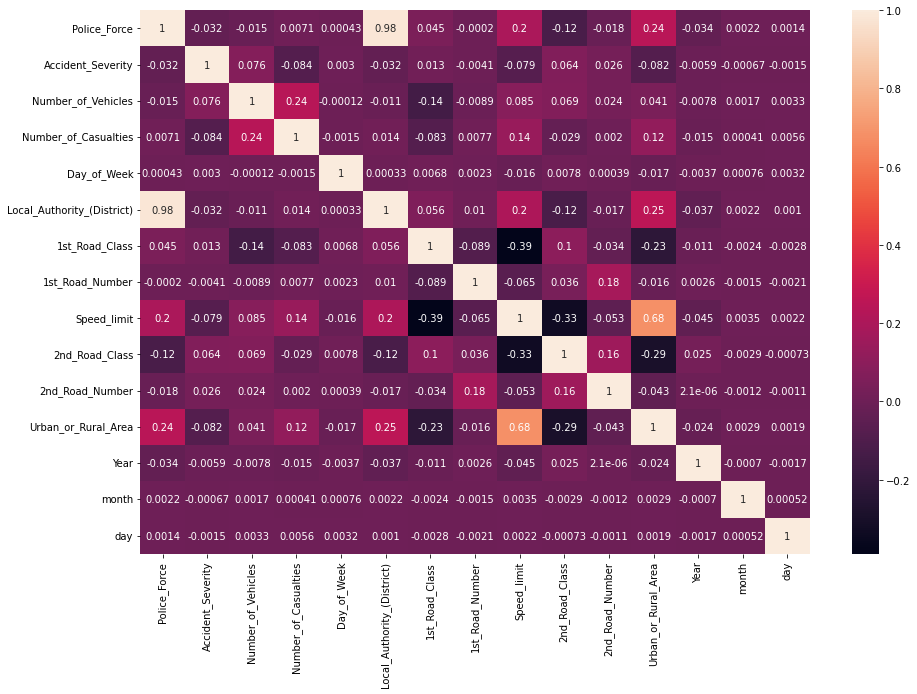

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Number of Casualties with respect to Year and Accident_Severity

In [45]:
label_df=df.groupby(['Year','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [46]:
value_df=df.groupby(['Year','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


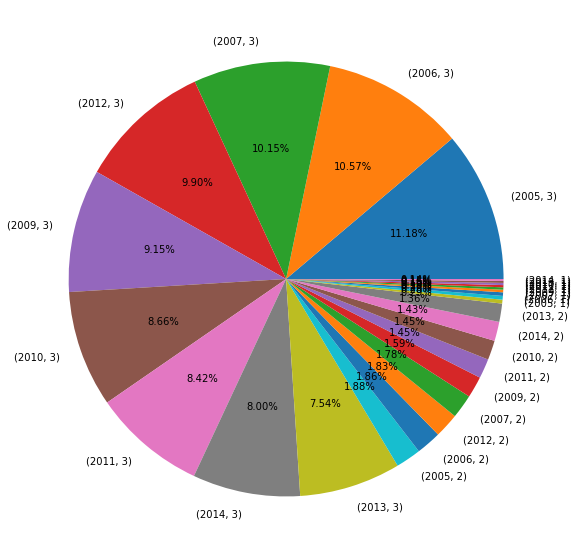

In [47]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Maximum number of Casualties happened in the year 2005 of Accident_Severity type 3. 

In [48]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


<AxesSubplot:xlabel='Year', ylabel='Number_of_Casualties'>

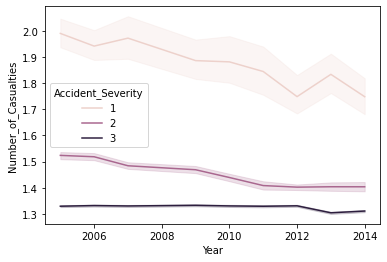

In [49]:
sns.lineplot(x=df['Year'],y=df['Number_of_Casualties'],hue=df['Accident_Severity'])

# Observations:
1. Number of casualties was maximum in 2005 
2. Number of casualities due to accident severity 1 is minimum in 2012 and maximum in 2006

<AxesSubplot:xlabel='month', ylabel='Number_of_Casualties'>

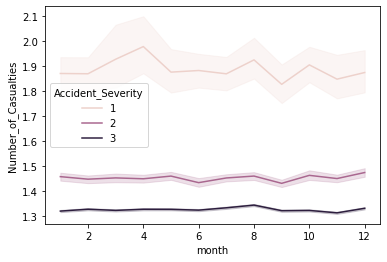

In [50]:
sns.lineplot(x=df['month'],y=df['Number_of_Casualties'],hue=df['Accident_Severity'])

# Observations:
1. Number of casualities due to accident severity 1 is minimum in month of 9 and maximum in month of 4

In [51]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


<AxesSubplot:xlabel='Day_of_Week', ylabel='Number_of_Casualties'>

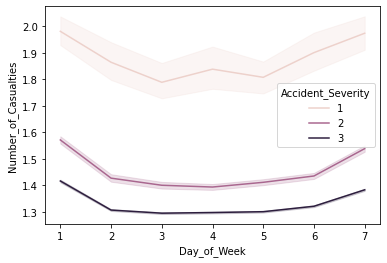

In [52]:
sns.lineplot(x=df['Day_of_Week'],y=df['Number_of_Casualties'],hue=df['Accident_Severity'])

# Observations:
1. Number of casualities due to accident severity 1 is minimum on the day of week 3 and maximum on the day of week 1 and 7
2. Number of casualties is more due to accident severity 1 as comapred to 2 and 3.

In [53]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


In [54]:
df['Junction_Control'].value_counts()

Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


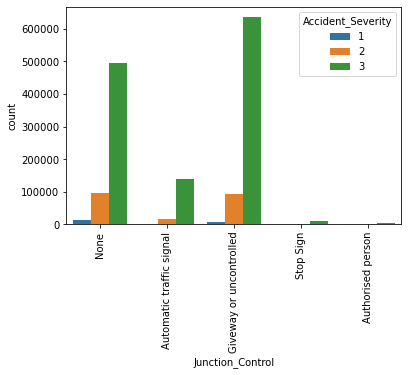

In [55]:
sns.countplot(df['Junction_Control'],hue=df['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

# Observations:
1. Number of casualities due to accident severity 3 is maximum at Giveway or uncontrolled 

In [56]:
df['Local_Authority_(District)'].value_counts()

300    27675
204    19984
102    14999
91     14068
1      13644
       ...  
941      318
936      312
166      267
141      251
933      237
Name: Local_Authority_(District), Length: 416, dtype: int64

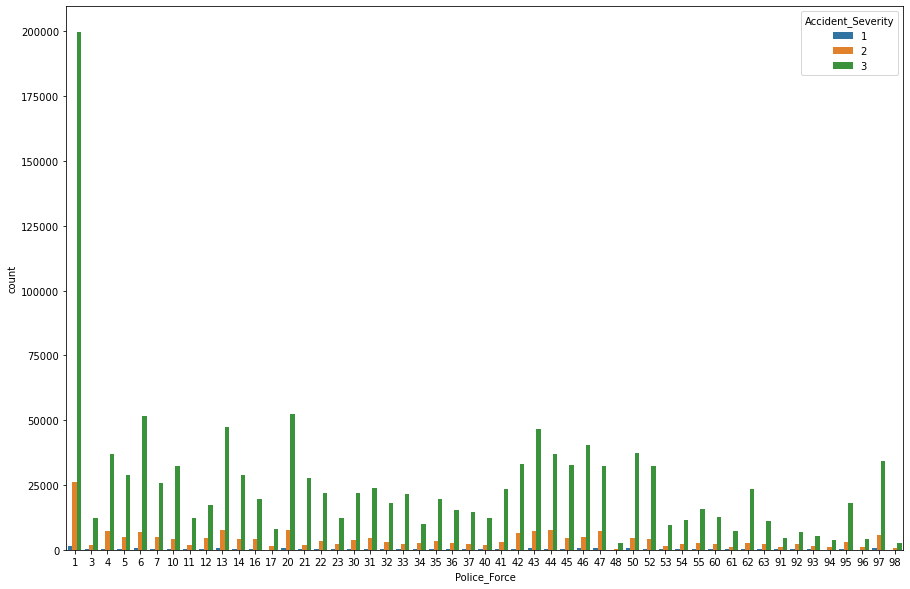

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Police_Force'],hue=df['Accident_Severity'])
plt.show()


# Number of Casualties with respect to Month and Accident_Severity

In [58]:
label_df=df.groupby(['month','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [59]:
value_df=df.groupby(['month','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


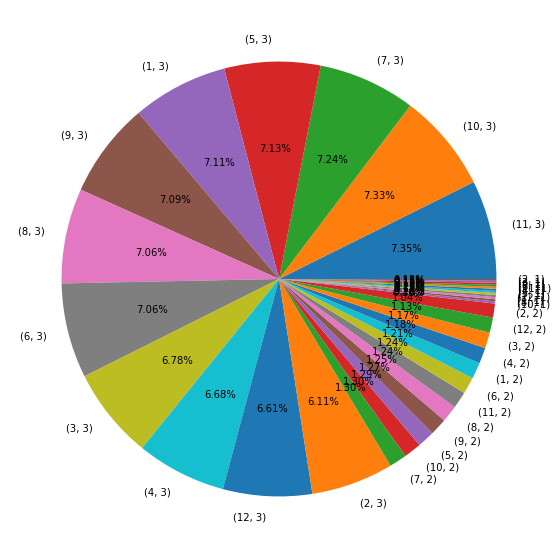

In [60]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [61]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


In [62]:
df['Junction_Control']


0                              None
1          Automatic traffic signal
2                              None
3                              None
4                              None
                     ...           
1504145                        None
1504146                        None
1504147                        None
1504148     Giveway or uncontrolled
1504149     Giveway or uncontrolled
Name: Junction_Control, Length: 1504150, dtype: object

In [63]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='Number_of_Casualties'>

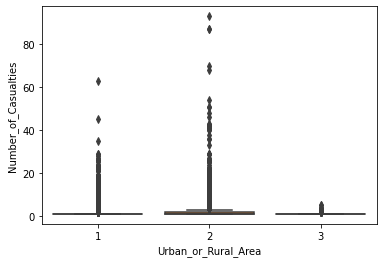

In [64]:
sns.boxplot(x=df['Urban_or_Rural_Area'],y=df['Number_of_Casualties'])

In [65]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


In [66]:
df.describe()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,month,day
count,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03,6.568917e+00,1.570749e+01
std,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00,3.426095e+00,8.659142e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03,1.000000e+00,1.000000e+00
25%,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03,4.000000e+00,8.000000e+00
50%,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03,7.000000e+00,1.600000e+01
75%,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03,1.200000e+01,3.100000e+01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_Vehicles'>

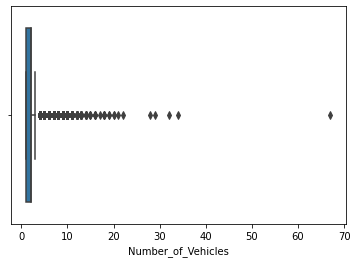

In [67]:
sns.boxplot(df['Number_of_Vehicles'])

In [68]:
q1=df['Number_of_Vehicles'].quantile(0.25)

In [69]:
q3=df['Number_of_Vehicles'].quantile(0.75)

In [70]:
IQR=q3-q1

In [71]:
lower=q1-1.5*IQR

In [72]:
upper=q3+1.5*IQR

In [73]:
df=df[(df['Number_of_Vehicles']>lower) & (df['Number_of_Vehicles']<upper)]

In [74]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Local_Authority_(District)'>

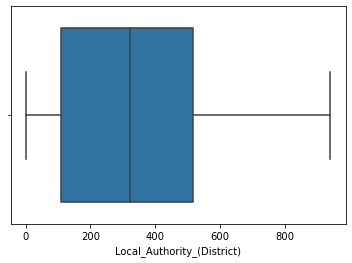

In [75]:
sns.boxplot(df['Local_Authority_(District)'])

<AxesSubplot:xlabel='Police_Force'>

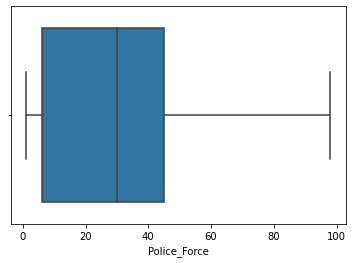

In [76]:
sns.boxplot(x=df['Police_Force'])

In [77]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


# Number of Casualties with respect to Day_of_Week and Accident_Severity

In [78]:
label_df=df.groupby(['Day_of_Week','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [79]:
value_df=df.groupby(['Day_of_Week','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


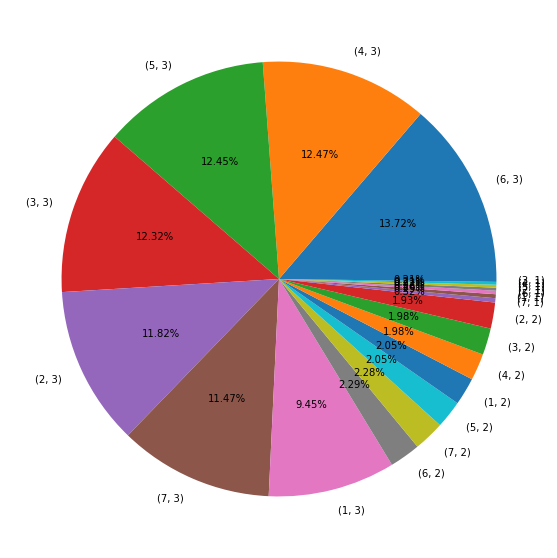

In [80]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [81]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,1,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,1,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,1,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,1,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,1,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,2,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,1,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,2,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_Casualties'>

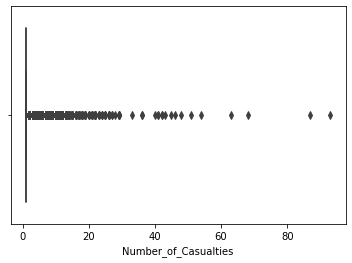

In [82]:
sns.boxplot(df['Number_of_Casualties'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_Casualties', ylabel='Density'>

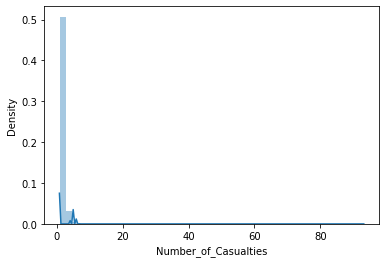

In [83]:
sns.distplot(df['Number_of_Casualties'])

In [84]:
df['Number_of_Casualties']=np.log(df['Number_of_Casualties'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_5484\1579705863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Casualties']=np.log(df['Number_of_Casualties'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_Casualties', ylabel='Density'>

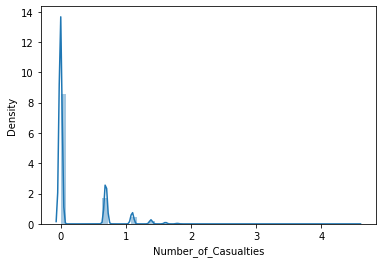

In [85]:
sns.distplot(df['Number_of_Casualties'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='Density'>

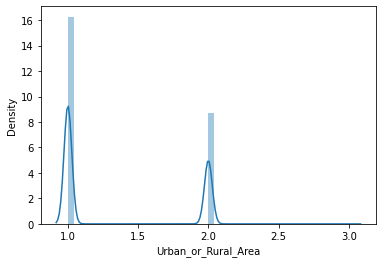

In [86]:
sns.distplot(df['Urban_or_Rural_Area'])

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='Number_of_Casualties'>

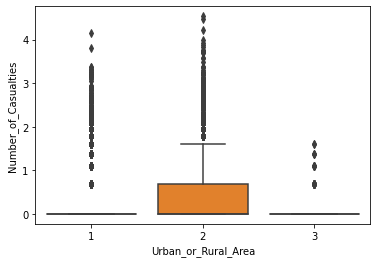

In [87]:
sns.boxplot(x=df['Urban_or_Rural_Area'],y=df['Number_of_Casualties'])

# Number of Casualties with respect to Top 10 Local_Authority_(District) and Accident_Severity

In [88]:
label_df=df.groupby(['Local_Authority_(District)','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [89]:
value_df=df.groupby(['Local_Authority_(District)','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


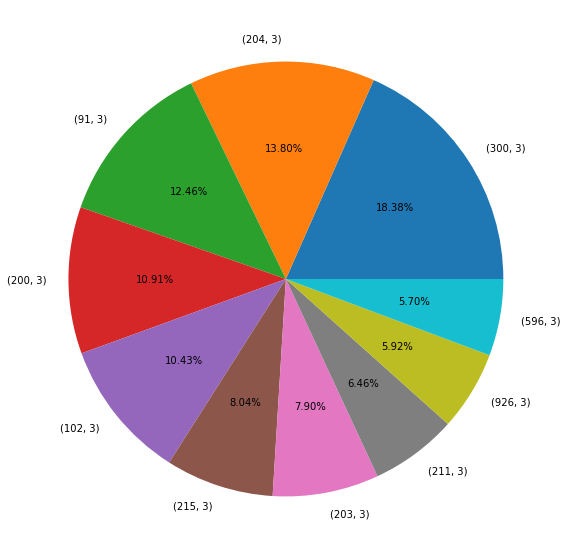

In [90]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

# Number of Casualties with respect to Road_Surface_Conditions and Accident_Severity

In [91]:
label_df=df.groupby(['Road_Surface_Conditions','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [92]:
value_df=df.groupby(['Road_Surface_Conditions','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


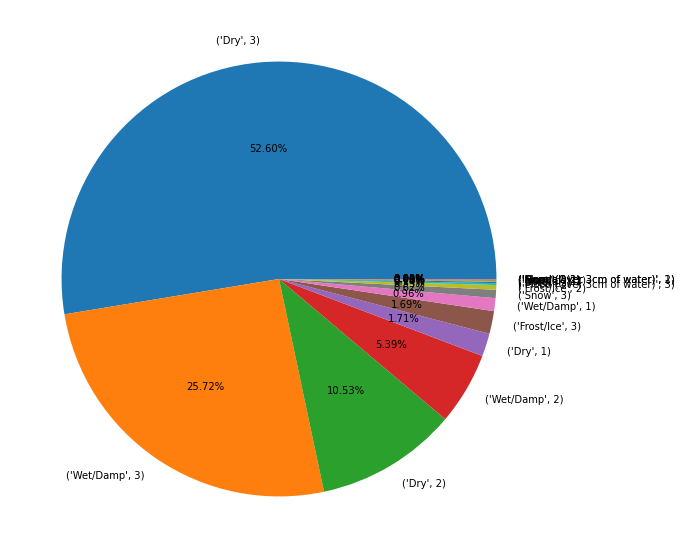

In [93]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Number of Casualties with respect to Weather Conditions and Accident_Severity

In [94]:
label_df=df.groupby(['Weather_Conditions','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [95]:
value_df=df.groupby(['Weather_Conditions','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


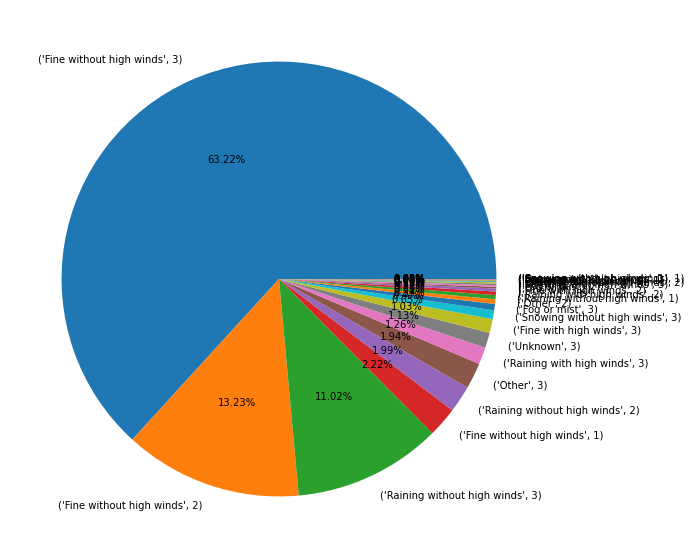

In [96]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Number of Casualties with respect to Junction_Control and Accident_Severity

In [97]:
label_df=df.groupby(['Junction_Control','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [98]:
value_df=df.groupby(['Junction_Control','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


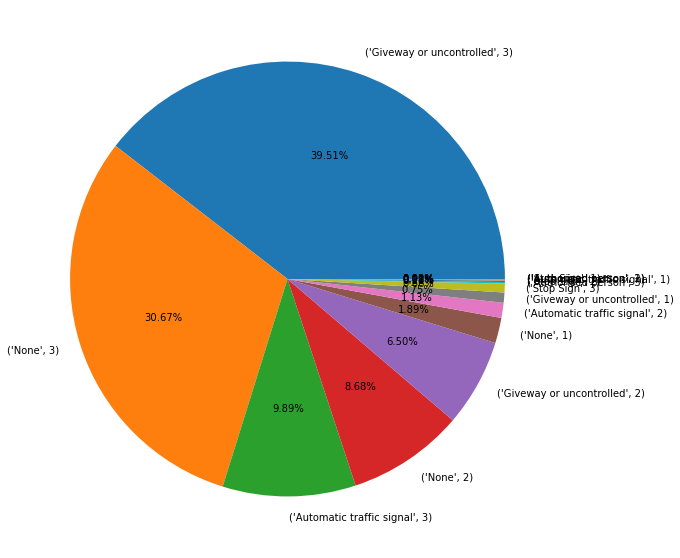

In [99]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [100]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
0,1,2,1,0.000000,3,12,3,3218,Single carriageway,30,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,4,1
1,1,3,1,0.000000,4,12,4,450,Dual carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,5,1
2,1,3,2,0.000000,5,12,5,0,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,6,1
3,1,3,1,0.000000,6,12,3,3220,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,7,1
4,1,3,1,0.000000,2,12,6,0,Single carriageway,30,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,0.000000,1,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,2014,7,12
1504146,98,3,2,0.693147,5,917,2,74,Dual carriageway,70,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,2014,11,12
1504147,98,3,1,0.000000,3,917,4,721,Single carriageway,40,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,2014,9,12
1504148,98,2,3,0.693147,4,917,3,75,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


# Number of Casualties with respect to Light_Conditions and Accident_Severity

In [101]:
label_df=df.groupby(['Light_Conditions','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [102]:
value_df=df.groupby(['Light_Conditions','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


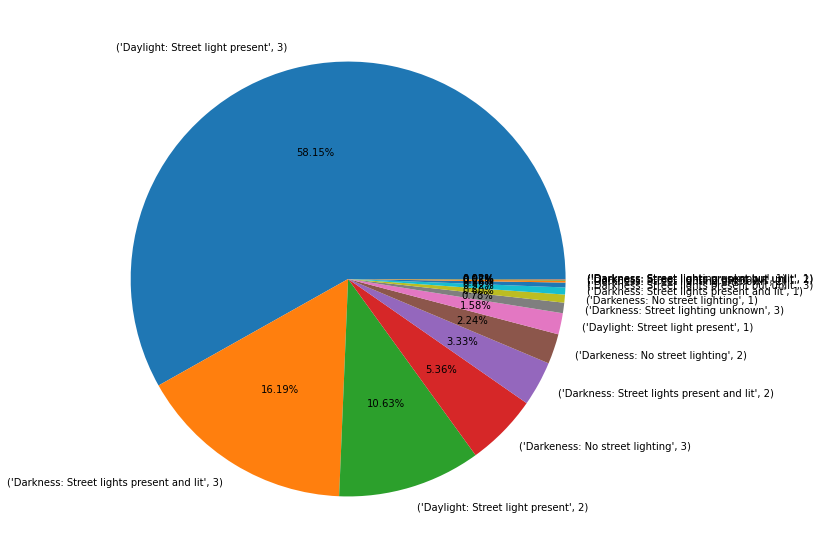

In [103]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Number of Casualties with respect to Speed_limit and Accident_Severity

In [104]:
label_df=df.groupby(['Speed_limit','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [105]:
value_df=df.groupby(['Speed_limit','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


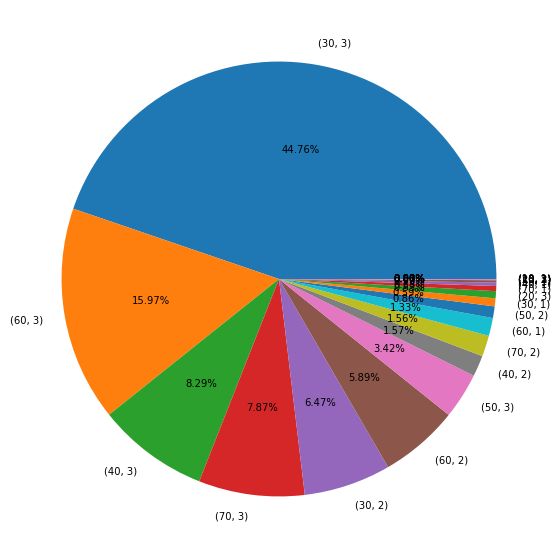

In [106]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Number of Casualties with respect to Road Type and Accident_Severity

In [107]:
label_df=df.groupby(['Road_Type','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).index


In [108]:
value_df=df.groupby(['Road_Type','Accident_Severity'])['Number_of_Casualties'].sum().sort_values(ascending=False).values


In [109]:
label_df

MultiIndex([('Single carriageway', 3),
            (  'Dual carriageway', 3),
            ('Single carriageway', 2),
            (        'Roundabout', 3),
            (  'Dual carriageway', 2),
            ('Single carriageway', 1),
            (         'Slip road', 3),
            (    'One way street', 3),
            (  'Dual carriageway', 1),
            (        'Roundabout', 2),
            (           'Unknown', 3),
            (    'One way street', 2),
            (         'Slip road', 2),
            (           'Unknown', 2),
            (        'Roundabout', 1),
            (         'Slip road', 1),
            (    'One way street', 1),
            (           'Unknown', 1)],
           names=['Road_Type', 'Accident_Severity'])

In [110]:
value_df

array([1.66075781e+05, 4.26988137e+04, 3.71605782e+04, 1.41076972e+04,
       7.38284937e+03, 6.10880202e+03, 3.04555787e+03, 2.94961504e+03,
       1.49202537e+03, 1.24933629e+03, 9.96685563e+02, 4.34661389e+02,
       3.26928154e+02, 1.48326717e+02, 8.26784184e+01, 4.34955880e+01,
       4.18539249e+01, 1.69317230e+01])

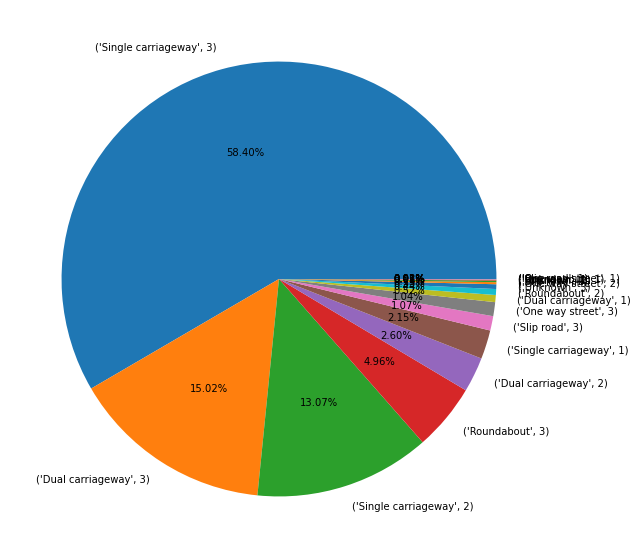

In [111]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [112]:
df.describe()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year,month,day
count,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06,1.470069e+06
mean,3.015398e+01,2.838610e+00,1.771752e+00,1.934349e-01,4.118461e+00,3.470297e+02,4.106251e+00,1.015518e+03,3.879911e+01,2.706421e+00,3.855496e+02,1.349746e+00,2.009372e+03,6.568674e+00,1.570537e+01
std,2.555488e+01,4.007160e-01,5.827306e-01,3.828468e-01,1.924441e+00,2.597905e+02,1.421990e+00,1.828306e+03,1.399903e+01,3.200967e+00,1.308706e+03,4.770753e-01,3.013065e+00,3.425420e+00,8.659101e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03,1.000000e+00,1.000000e+00
25%,6.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.090000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03,4.000000e+00,8.000000e+00
50%,3.000000e+01,3.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00,3.210000e+02,4.000000e+00,1.330000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03,7.000000e+00,1.600000e+01
75%,4.500000e+01,3.000000e+00,2.000000e+00,0.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.360000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,9.800000e+01,3.000000e+00,3.000000e+00,4.532599e+00,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03,1.200000e+01,3.100000e+01


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Police_Force', ylabel='Density'>

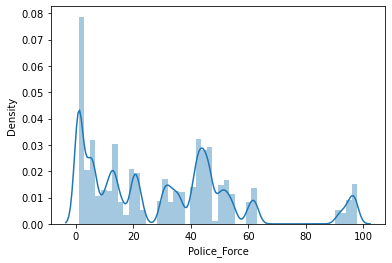

In [113]:
sns.distplot(df['Police_Force'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Accident_Severity', ylabel='Density'>

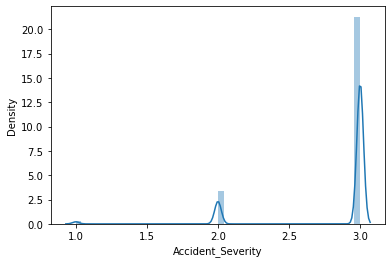

In [114]:
sns.distplot(df['Accident_Severity'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_Vehicles', ylabel='Density'>

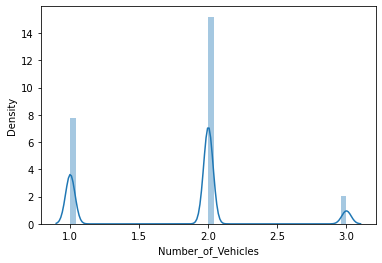

In [115]:
sns.distplot(df['Number_of_Vehicles'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day_of_Week', ylabel='Density'>

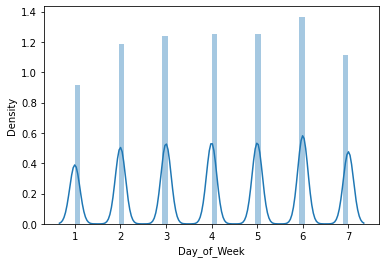

In [116]:
sns.distplot(df['Day_of_Week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Local_Authority_(District)', ylabel='Density'>

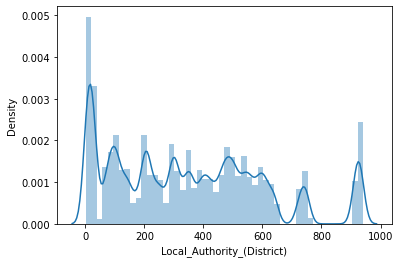

In [117]:
sns.distplot(df['Local_Authority_(District)'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1st_Road_Number', ylabel='Density'>

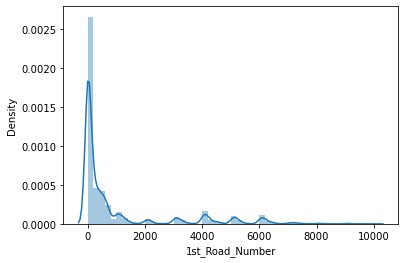

In [118]:
sns.distplot(df['1st_Road_Number'])

In [119]:
df['1st_Road_Number']=np.log(df['1st_Road_Number'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_5484\1101764915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['1st_Road_Number']=np.log(df['1st_Road_Number'])


In [120]:
df=df[df['1st_Road_Number']>0]



C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1st_Road_Number', ylabel='Density'>

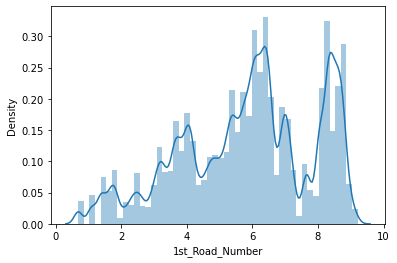

In [121]:
sns.distplot(df['1st_Road_Number'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Speed_limit', ylabel='Density'>

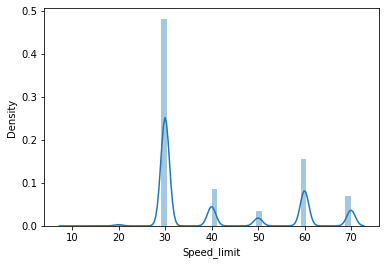

In [122]:
sns.distplot(df['Speed_limit'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2nd_Road_Number', ylabel='Density'>

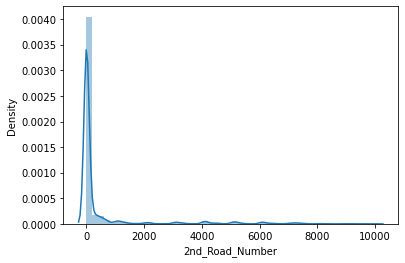

In [123]:
sns.distplot(df['2nd_Road_Number'])

In [124]:
df['2nd_Road_Number']=np.log(df['2nd_Road_Number'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_5484\3393620547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2nd_Road_Number']=np.log(df['2nd_Road_Number'])


In [125]:
df=df[df['2nd_Road_Number']>0]


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2nd_Road_Number', ylabel='Density'>

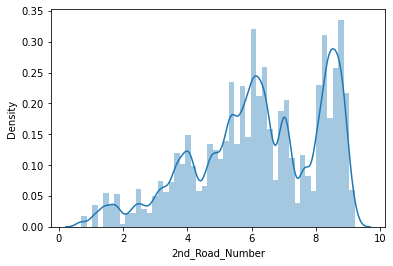

In [126]:
sns.distplot(df['2nd_Road_Number'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='Density'>

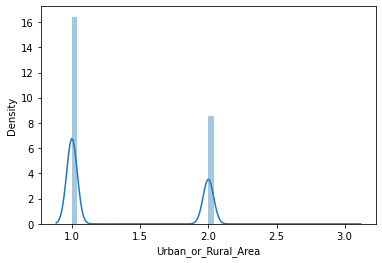

In [127]:
sns.distplot(df['Urban_or_Rural_Area'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

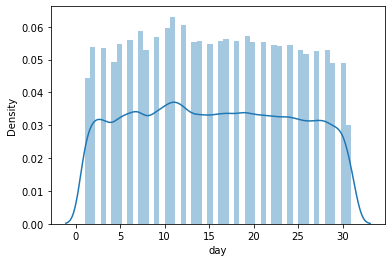

In [128]:
sns.distplot(df['day'])

In [129]:
df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year,month,day
8,1,3,2,0.693147,7,12,3,8.074649,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,1,15
10,1,3,1,0.000000,1,12,3,1.386294,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,2005,1,16
11,1,3,2,0.000000,3,12,3,8.077137,Single carriageway,30,...,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,2005,1,25
13,1,3,2,0.000000,3,12,3,8.076205,One way street,30,...,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,2005,1,18
17,1,3,2,0.000000,6,12,3,8.076515,Single carriageway,30,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,2005,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504135,98,2,2,0.000000,4,917,4,6.580639,Single carriageway,30,...,Daylight: Street light present,Other,Wet/Damp,None,None,2,No,2014,5,11
1504139,98,3,1,0.000000,2,917,3,6.563856,Single carriageway,60,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,2014,11,17
1504142,98,3,1,0.000000,4,917,4,8.856518,Single carriageway,60,...,Darkeness: No street lighting,Fog or mist,Wet/Damp,None,None,2,Yes,2014,3,12
1504148,98,2,3,0.693147,4,917,3,4.317488,Single carriageway,60,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,2014,12,17


In [130]:
le=LabelEncoder()

In [131]:
df['Road_Type']=le.fit_transform(df['Road_Type'])


In [132]:
df['Junction_Control']=le.fit_transform(df['Junction_Control'])

In [133]:
df['Light_Conditions']=le.fit_transform(df['Light_Conditions'])

In [134]:
df['Weather_Conditions']=le.fit_transform(df['Weather_Conditions'])

In [135]:
df['Road_Surface_Conditions']=le.fit_transform(df['Road_Surface_Conditions'])

In [136]:
df['Special_Conditions_at_Site']=le.fit_transform(df['Special_Conditions_at_Site'])

In [137]:
df['Carriageway_Hazards']=le.fit_transform(df['Carriageway_Hazards'])

In [138]:
df['Did_Police_Officer_Attend_Scene_of_Accident']=le.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])

In [139]:
y=df['Accident_Severity']

In [140]:
X=df.drop(['Accident_Severity','Police_Force','Speed_limit'],axis=1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [142]:
sc=StandardScaler()


In [143]:
X=sc.fit_transform(X)


In [144]:
lr=LogisticRegression()


In [145]:
lr.fit(X_train,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
y_pred=lr.predict(X_test)

In [147]:
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [148]:
accuracy_score(y_test,y_pred)

0.8837024618371129

In [149]:
y_pred=lr.predict(X_train)

In [150]:
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [151]:
accuracy_score(y_train,y_pred)

0.883656289707751

In [152]:
rfc=RandomForestClassifier()


In [153]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [154]:
y_pred=rfc.predict(X_test)

In [155]:
accuracy_score(y_test,y_pred)

0.8894026294891026

In [156]:
y_pred=rfc.predict(X_train)

In [157]:
accuracy_score(y_train,y_pred)

0.9999382323874064

In [158]:
dtc=DecisionTreeClassifier()


In [159]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [160]:
y_pred=dtc.predict(X_test)

In [161]:
accuracy_score(y_test,y_pred)

0.7969999117621106

In [162]:
confusion_matrix(y_test,y_pred)

array([[   32,    71,   308],
       [   95,  1309,  4775],
       [  396,  5858, 43821]], dtype=int64)

In [163]:
y_pred=dtc.predict(X_train)

In [164]:
accuracy_score(y_train,y_pred)

0.999960292249047

In [166]:
confusion_matrix(y_train,y_pred)

array([[  1672,      0,      0],
       [     0,  24698,      0],
       [     0,      9, 200277]], dtype=int64)

In [167]:
knc=KNeighborsClassifier()


In [168]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
y_pred=knc.predict(X_test)

In [170]:
accuracy_score(y_test,y_pred)

0.8714550427953763

In [171]:
confusion_matrix(y_test,y_pred)

array([[    0,     7,   404],
       [    0,   161,  6018],
       [   11,   844, 49220]], dtype=int64)

# We will choose Logistic Regression Model because of no overfitting probelm
# Accuracy score of Logistic Regression Model for training and testing is almost similar.